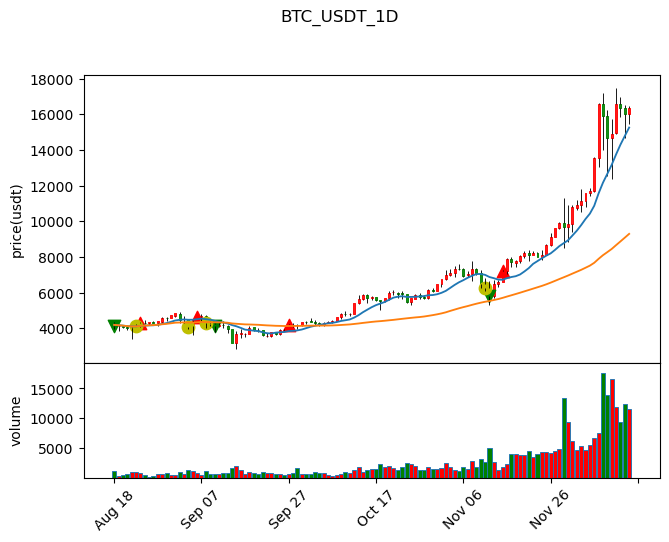

In [10]:
""" K线相关"""

import mplfinance as mpf
import pandas as pd

# 读入数据
path = 'BTC_USDT_1D.csv'  # 数据存放路径
df = pd.read_csv(path, skiprows=1, parse_dates=['candle_begin_time'],encoding='latin1')
df.set_index(['candle_begin_time'], inplace=True)

# 设置k线图的风格(标题、颜色、背景)
title = 'BTC_USDT_1D'   # 设置K线图的标题

# up设置上涨颜色，down设置下跌颜色，edge设置K线边框的颜色
# volume参数，用于设置成交量颜色
my_color = mpf.make_marketcolors(up='red',down='green',edge='inherit',volume='inherit')
 
my_style = mpf.make_mpf_style(marketcolors=my_color)

# 选时
df = df[1:120]

# 在K线图中加入均线 买卖点
add_plot = [mpf.make_addplot(df[['ma10', 'ma50']]),
            mpf.make_addplot(df['signal_long'], scatter=True, markersize=80, marker='^', color='r'),
            mpf.make_addplot(df['signal_short'], scatter=True, markersize=80, marker='v', color='g'),
            mpf.make_addplot(df['signal_0'], scatter=True, markersize=80, marker='o', color='y')]


mpf.plot(df, type='candle', addplot=add_plot, volume=True, title=title, ylabel="price(usdt)",
         style=my_style, ylabel_lower="volume")

